
# Семинар 3. KNN

#### Задача 1.
Предположим, мы решаем задачу классификации на три класса по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | -1        | 1     |
| 2         | 2         | 1     |
| 3         | 2         | 2     |
| 1         | 0         | 3     |
| 2         | -2        | 3     |

Каковы будут предсказания для объекта $x=(2, -1)$?

#### Задача 2.
Визуализируйте разделяющую поверхность между классами для следующей выборки:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 2         | 2        | 1     |
| 3         | 2         | 1     |
| 2         | 0         | 2     |
| 1         | -1         | 3     |
| 1        | 1        | 3     |

Используйте k=1 и евклидово расстояние.

__Решение.__

В задачах классификации с двумя признаками мы можем изобразить признаковое пространство на плоскости и раскрасить его в разные цвета в соответствии с классом каждой точки плоскости. В этом и состоит сейчас наша задача.

Для начала отобразим на плоскости обучающую выборку - пять точек - в соответствии с их координатами.

При $k=1$ каждая точка плоскости будет относиться к тому же классу, что и ближайший к ней объект обучающей выборки. Если нам даны две точки разных классов, то чтобы провести между ними границу классов, нужно построить серединный перпендикудяр. Для случая с несколькими точками нужно построить несколько серединных перпендикуляров, найти их точки пересечения и определить, какие области к каким классам относятся. Более строго такая конструкция задается с помощью [Диаграммы Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE), но мы не будем вдаваться в ее детали.

<div>
<img src="classifi.png" width="350"/>
</div>

#### Задача 3.
Предположим, мы решаем задачу регрессии по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 3.5     |
| 2         | 2         | 2.3     |
| 3         | 2         | 1.7     |
| 1         | 0         | -0.4     |
| 2         | -2        | 0.1     |

Каковы будут предсказания для объекта $x=(2, -1)$?

#### Вопрос: каковы параметры и гиперпараметры метода kNN?

#### Вопрос: какова динамика качества работы kNN при увеличении k?

__Ответ:__

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. Если, к примеру, в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении.

При $k$, равном числу объектов в выборке, для всех объектов будет предсказываться одно и то же, что вновь говорит о низком качестве работы классификатора. Получается, что качество kNN при увеличении $k$ должно сначала расти, а потом падать, и оптимум будем где-то посередине.

Рассмотрим синтетический пример: на рисунке визуализирована обучающая выборка ("настоящая" разделяющая поверхность - прямая) и разделяющая поверхность kNN по аналогии с задачей 2, и на разных графиках используется разное число соседей $k$:

<div>
<img src="k_grid.png" width="550"/>
</div>

При использовании малых $k$ разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и ровнее и при $k=50$ выглядит наиболее разумно. При большем k разделяющая поверхность уходит от линейной, и оранжевый класс "захватывает" синий.

#### Вопрос: почему при использовании kNN важно нормировать данные?

### Практическая часть

In [35]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# изображения цифр
from sklearn.datasets import load_digits
# классификатор
from sklearn.neighbors import KNeighborsClassifier
# шаффлер данных
from sklearn.utils import shuffle
# поиск гиперпараметров
from sklearn.model_selection import GridSearchCV

Инициализируйте классификатор с дефолтным числом соседей.

In [3]:
clf = # code

data = load_digits()
X = data.images
y = data.target

In [ ]:
# вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки
X = X.reshape(X.shape[0], -1)

# перемешиваем данные
X, y = shuffle(X, y)
print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

In [12]:
X_train, y_train = X[:700, :], y[:700]
X_val, y_val = X[700:1300, :], y[700:1300]
X_test, y_test = X[1300:, :], y[1300:]

Обучите классификатор и сделайте предсказания.

In [13]:
# code

Посчитайте долю правильных ответов (accuracy).

In [ ]:
# code 

Попробуем использовать разные значения гиперпараметра k. Сравнивать разные значения k по обучающей выборке бесполезно: каждый объект является ближайшим сам к себе и оптимальное k будет равно 1. Будем сравнивать разные k по качеству на валидационной выборке:

In [ ]:
for k in range(1, 20):
    # code
    y_predicted = # code
    print(f"k = {k}; accuracy = {np.mean(y_val==y_predicted):.3f}")

In [16]:
best_k = #

Сравним точность (accuracy) на обучении, валидации и тесте:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

### Grid Search

In [54]:
clf_cv = GridSearchCV(estimator=clf,           
                      param_grid={'n_neighbors': np.arange(1, 20)}, 
                      cv=5,
                      scoring='accuracy')

In [ ]:
clf_cv.fit(X_train, y_train)

In [58]:
cv_results = pd.DataFrame(clf_cv.cv_results_)

In [59]:
n_neighbors = cv_results['param_n_neighbors']
mean_score = cv_results['mean_test_score']
std_score = cv_results['std_test_score']

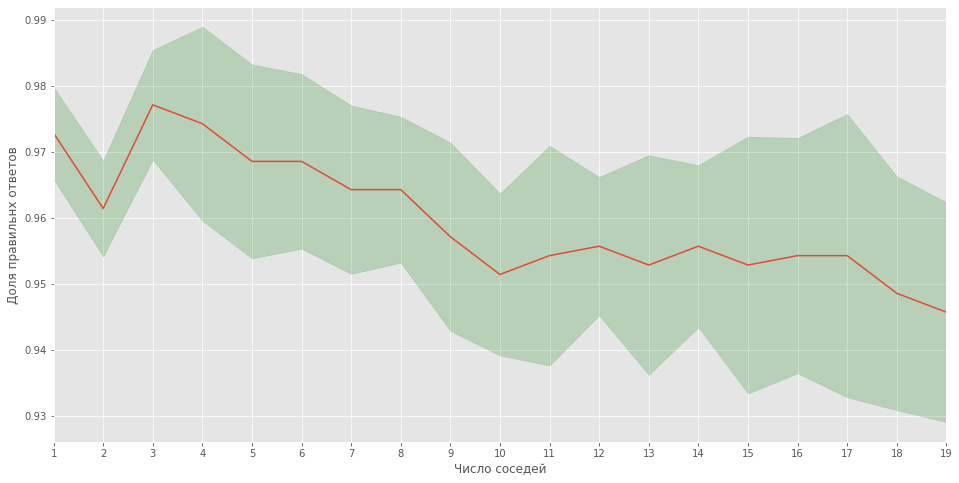

In [63]:
plt.figure(figsize=(16, 8))
plt.plot(n_neighbors, mean_score)
plt.fill_between(list(n_neighbors), mean_score - std_score, mean_score + std_score, alpha=0.2, color='green')
plt.xticks(list(n_neighbors))
plt.xlabel('Число соседей')
plt.ylabel('Доля правильнх ответов')
plt.xlim(min(n_neighbors), max(n_neighbors))
plt.show()